In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# clubes = pd.read_csv("C:/Users/Vinicius307/Downloads/Winpython64-3.11.5.0/WPy64-31150/campeonato-brasileiro-full.csv")
clubes = pd.read_csv("D:/Users/vgls/Documents/GitHub/Analises_de_dados_esportes/dados/campeonato-brasileiro-full.csv")
clubes

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG
8401,8402,38,06/12/2023,21:32,Cuiaba,Athletico-PR,5-3-2,3-4-3,A. Cardoso de Oliveira,W. Carvalho,Cuiaba,Arena Pantanal,3,0,MT,PR
8402,8403,38,06/12/2023,21:32,Santos,Fortaleza,3-4-1-2,4-2-3-1,M. Fernandes,J. Vojvoda,Fortaleza,Estádio Urbano Caldeira,1,2,SP,CE
8403,8404,38,06/12/2023,21:32,Sao Paulo,Flamengo,4-2-3-1,4-2-3-1,D. Silvestre Júnior,A. Bacchi,Sao Paulo,Morumbi,1,0,SP,RJ


In [11]:
#filtrar estados do nordeste
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
clubes_nordeste = clubes[
    clubes['mandante_Estado'].isin(estados_nordeste) | 
    clubes['visitante_Estado'].isin(estados_nordeste)
]
clubes_nordeste

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
7,8,1,30/03/2003,16:00,Fortaleza,Bahia,NaN,NaN,NaN,NaN,-,Castelão,0,0,CE,BA
9,10,1,30/03/2003,16:00,Vitoria,Figueirense,NaN,NaN,NaN,NaN,-,Barradão,1,1,BA,SC
12,13,2,05/04/2003,16:00,Fluminense,Fortaleza,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,CE
16,17,2,06/04/2003,16:00,Bahia,Flamengo,NaN,NaN,NaN,NaN,Flamengo,Fonte Nova,1,2,BA,RJ
18,19,2,06/04/2003,16:00,Paysandu,Vitoria,NaN,NaN,NaN,NaN,Vitoria,Mangueirão,1,2,PA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,8385,36,30/11/2023,20:29,Bragantino,Fortaleza,4-2-3-1,4-4-2,P. Faria Caixinha,J. Vojvoda,Fortaleza,Nabizão,1,2,SP,CE
8390,8391,37,03/12/2023,18:30,America-MG,Bahia,4-1-4-1,3-5-2,D. Giacomini,R. Ceni,America-MG,Estádio Raimundo Sampaio,3,2,MG,BA
8391,8392,37,03/12/2023,18:30,Fortaleza,Goias,4-4-2,4-1-4-1,J. Vojvoda,M. Henrique,Fortaleza,Arena Castelão,1,0,CE,GO
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG


# Limpeza de dados

In [12]:
#removendo valores Not a Number por uma string 'não listado' nas colunas formacao_mandante, formacao_visitante, tecnico_mandante e tecnico_visitante

colunas_para_preencher = ['formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante']
clubes_nordeste[colunas_para_preencher] = clubes_nordeste[colunas_para_preencher].fillna('não listado')
clubes_nordeste

D:\Users\vgls\AppData\Local\Temp\ipykernel_20160\2617280021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubes_nordeste[colunas_para_preencher] = clubes_nordeste[colunas_para_preencher].fillna('não listado')


,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
7,8,1,30/03/2003,16:00,Fortaleza,Bahia,não listado,não listado,não listado,não listado,-,Castelão,0,0,CE,BA
9,10,1,30/03/2003,16:00,Vitoria,Figueirense,não listado,não listado,não listado,não listado,-,Barradão,1,1,BA,SC
12,13,2,05/04/2003,16:00,Fluminense,Fortaleza,não listado,não listado,não listado,não listado,-,Maracanã,1,1,RJ,CE
16,17,2,06/04/2003,16:00,Bahia,Flamengo,não listado,não listado,não listado,não listado,Flamengo,Fonte Nova,1,2,BA,RJ
18,19,2,06/04/2003,16:00,Paysandu,Vitoria,não listado,não listado,não listado,não listado,Vitoria,Mangueirão,1,2,PA,BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,8385,36,30/11/2023,20:29,Bragantino,Fortaleza,4-2-3-1,4-4-2,P. Faria Caixinha,J. Vojvoda,Fortaleza,Nabizão,1,2,SP,CE
8390,8391,37,03/12/2023,18:30,America-MG,Bahia,4-1-4-1,3-5-2,D. Giacomini,R. Ceni,America-MG,Estádio Raimundo Sampaio,3,2,MG,BA
8391,8392,37,03/12/2023,18:30,Fortaleza,Goias,4-4-2,4-1-4-1,J. Vojvoda,M. Henrique,Fortaleza,Arena Castelão,1,0,CE,GO
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG


# Adição de colunas

In [13]:
# Adiciona a coluna que apresenta o placar de cada jogo
clubes_nordeste['placar'] = clubes_nordeste['mandante_Placar'].astype(str) + '-' + clubes_nordeste['visitante_Placar'].astype(str)
clubes_nordeste

D:\Users\vgls\AppData\Local\Temp\ipykernel_20160\3906713690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubes_nordeste['placar'] = clubes_nordeste['mandante_Placar'].astype(str) + '-' + clubes_nordeste['visitante_Placar'].astype(str)


,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,placar
7,8,1,30/03/2003,16:00,Fortaleza,Bahia,não listado,não listado,não listado,não listado,-,Castelão,0,0,CE,BA,0-0
9,10,1,30/03/2003,16:00,Vitoria,Figueirense,não listado,não listado,não listado,não listado,-,Barradão,1,1,BA,SC,1-1
12,13,2,05/04/2003,16:00,Fluminense,Fortaleza,não listado,não listado,não listado,não listado,-,Maracanã,1,1,RJ,CE,1-1
16,17,2,06/04/2003,16:00,Bahia,Flamengo,não listado,não listado,não listado,não listado,Flamengo,Fonte Nova,1,2,BA,RJ,1-2
18,19,2,06/04/2003,16:00,Paysandu,Vitoria,não listado,não listado,não listado,não listado,Vitoria,Mangueirão,1,2,PA,BA,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,8385,36,30/11/2023,20:29,Bragantino,Fortaleza,4-2-3-1,4-4-2,P. Faria Caixinha,J. Vojvoda,Fortaleza,Nabizão,1,2,SP,CE,1-2
8390,8391,37,03/12/2023,18:30,America-MG,Bahia,4-1-4-1,3-5-2,D. Giacomini,R. Ceni,America-MG,Estádio Raimundo Sampaio,3,2,MG,BA,3-2
8391,8392,37,03/12/2023,18:30,Fortaleza,Goias,4-4-2,4-1-4-1,J. Vojvoda,M. Henrique,Fortaleza,Arena Castelão,1,0,CE,GO,1-0
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG,4-1


# Padronizando o nome de todas as colunas

In [14]:
#Como um amante de python, sempre uso o padrão snake case na nomeação de variáveis, deixarei as colunas nesse estilo!

clubes_nordeste = clubes_nordeste.rename(columns={'mandante_Placar':'mandante_placar',
                                'visitante_Placar':'visitante_placar',
                                'mandante_Estado': 'mandante_estado',
                                'visitante_Estado':'visitante_estado'
})

In [15]:
#Armazena os gols da casa e do visitante em listas
gols_casa = [int(gols) for gols in clubes_nordeste['mandante_placar']]
gols_fora = [int(gols)for gols in clubes_nordeste['visitante_placar']]

#une os valores de gols casa e gols fora de acordo com o índice
placares = zip(gols_casa,gols_fora)

resultados = []

for placar in placares:
    # Se o time da casa fez mais gols que o visitante
    if placar[0] > placar[1]:
       resultados.append('Vitória Casa')
    # Se os dois times fizeram a mesma quantidade de gols
    elif placar[0] == placar[1]:
       resultados.append('Empate')
    # Se o time visitante fez mais gols que o time da casa
    else:
       resultados.append('Vitória Fora')

# Adiciona a coluna que apresenta o resultado de cada jogo
clubes_nordeste['resultado'] = resultados
clubes_nordeste

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,placar,resultado
7,8,1,30/03/2003,16:00,Fortaleza,Bahia,não listado,não listado,não listado,não listado,-,Castelão,0,0,CE,BA,0-0,Empate
9,10,1,30/03/2003,16:00,Vitoria,Figueirense,não listado,não listado,não listado,não listado,-,Barradão,1,1,BA,SC,1-1,Empate
12,13,2,05/04/2003,16:00,Fluminense,Fortaleza,não listado,não listado,não listado,não listado,-,Maracanã,1,1,RJ,CE,1-1,Empate
16,17,2,06/04/2003,16:00,Bahia,Flamengo,não listado,não listado,não listado,não listado,Flamengo,Fonte Nova,1,2,BA,RJ,1-2,Vitória Fora
18,19,2,06/04/2003,16:00,Paysandu,Vitoria,não listado,não listado,não listado,não listado,Vitoria,Mangueirão,1,2,PA,BA,1-2,Vitória Fora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,8385,36,30/11/2023,20:29,Bragantino,Fortaleza,4-2-3-1,4-4-2,P. Faria Caixinha,J. Vojvoda,Fortaleza,Nabizão,1,2,SP,CE,1-2,Vitória Fora
8390,8391,37,03/12/2023,18:30,America-MG,Bahia,4-1-4-1,3-5-2,D. Giacomini,R. Ceni,America-MG,Estádio Raimundo Sampaio,3,2,MG,BA,3-2,Vitória Casa
8391,8392,37,03/12/2023,18:30,Fortaleza,Goias,4-4-2,4-1-4-1,J. Vojvoda,M. Henrique,Fortaleza,Arena Castelão,1,0,CE,GO,1-0,Vitória Casa
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG,4-1,Vitória Casa


In [16]:
clubes_nordeste.columns

Index(['ID', 'rodata', 'data', 'hora', 'mandante', 'visitante',
       'formacao_mandante', 'formacao_visitante', 'tecnico_mandante',
       'tecnico_visitante', 'vencedor', 'arena', 'mandante_placar',
       'visitante_placar', 'mandante_estado', 'visitante_estado', 'placar',
       'resultado'],
      dtype='object')

# Reordenação das colunas


In [17]:
# Remove as colunas e armazena em uma variável em forma de Série

# Reordenando as colunas
cols_to_move = ['formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante']
new_order = [col for col in clubes_nordeste.columns if col not in cols_to_move] + cols_to_move
clubes_nordeste = clubes_nordeste[new_order]
clubes_nordeste
times = sorted(clubes_nordeste['mandante'].unique())
times


['America-MG',
 'America-RN',
 'Athletico-PR',
 'Atletico-GO',
 'Atletico-MG',
 'Avai',
 'Bahia',
 'Barueri',
 'Botafogo-RJ',
 'Bragantino',
 'Brasiliense',
 'CSA',
 'Ceara',
 'Chapecoense',
 'Corinthians',
 'Coritiba',
 'Criciuma',
 'Cruzeiro',
 'Cuiaba',
 'Figueirense',
 'Flamengo',
 'Fluminense',
 'Fortaleza',
 'Goias',
 'Gremio',
 'Gremio Prudente',
 'Guarani',
 'Internacional',
 'Ipatinga',
 'Joinville',
 'Juventude',
 'Nautico',
 'Palmeiras',
 'Parana',
 'Paysandu',
 'Ponte Preta',
 'Portuguesa',
 'Santa Cruz',
 'Santo Andre',
 'Santos',
 'Sao Caetano',
 'Sao Paulo',
 'Sport',
 'Vasco',
 'Vitoria']

## Legenda
##### **temporada**: Ano/temporada do campeonato em disputa

##### **data_jogo:** Data e horário em que o jogo foi realizado

##### **rodada:** Rodada do campeonato em disputa

##### **time_casa:** Time que jogou como mandante

##### **time_fora:** time que jogou como visitante

##### **gols_casa:** Gols do time mandante no jogo inteiro (=99 caso seja nulo)

##### **gols_fora:** Gols do time visitante no jogo inteiro (=99 caso seja nulo)

##### **placar:** Placar final do jogo disputado (='99-99' caso seja nulo)

##### **resultado:** Resultado final do jogo disputado


In [18]:
times_nordeste = []

# Iterando sobre cada linha do DataFrame
for index, row in clubes_nordeste.iterrows():
    if row['mandante_estado'] in estados_nordeste:
        if row['mandante'] not in times_nordeste:
            times_nordeste.append(row['mandante'])

print(f'{len(times_nordeste)} times nordestinos que  disputaram o Brasileirão entre as temporadas de 2003 e 2023;')
for time in times_nordeste:
    print(time)

contagem_times = clubes_nordeste.groupby('mandante_estado').size().reset_index(name='quantidade')
contagem_times = contagem_times[contagem_times['mandante_estado'].isin(estados_nordeste)]

9 times nordestinos que  disputaram o Brasileirão entre as temporadas de 2003 e 2023;
Fortaleza
Vitoria
Bahia
Santa Cruz
America-RN
Sport
Nautico
Ceara
CSA


,mandante_estado,quantidade
0,AL,19
1,BA,411
2,CE,291
8,PE,342
11,RN,19


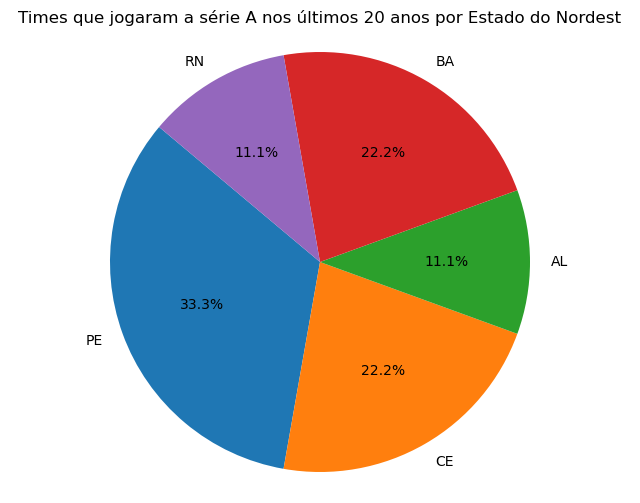

In [20]:
import matplotlib.pyplot as plt

# Dicionário de regiões e seus times
regioes = {
    'PE': ['Sport', 'Santa Cruz', 'Náutico'],
    'CE': ['Fortaleza', 'Ceará'],
    'AL': ['CSA'],
    'BA': ['Bahia','Vitória'],
    'RN': ['América-RN']
}

# Lista para armazenar as quantidades de times por estado
quantidades_por_estado = []

# Itera sobre as regiões para contar a quantidade de times em cada estado
for estado, times in regioes.items():
    quantidade = len(times)  # len() retorna o número de elementos na lista 'times'
    quantidades_por_estado.append(quantidade)

# Lista de estados para os rótulos do gráfico
estados = list(regioes.keys())

# Plotando o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(quantidades_por_estado, labels=estados, autopct='%1.1f%%', startangle=140)
plt.title('Times que jogaram a série A nos últimos 20 anos por Estado do Nordest')
plt.axis('equal')  # Garante que o gráfico de pizza seja desenhado como um círculo
plt.show()


## Times do Nordeste com mais participações

In [25]:
# Filtrar os jogos onde o time mandante está localizado em algum estado do Nordeste
brasileirao_nordeste = clubes_nordeste[clubes_nordeste['mandante_estado'].isin(estados_nordeste)]

# Armazenar na variável o nome de todos os times do Nordeste sem repetições
times_nordeste = sorted(brasileirao_nordeste['mandante'].unique())
times_nordeste

['America-RN',
 'Bahia',
 'CSA',
 'Ceara',
 'Fortaleza',
 'Nautico',
 'Santa Cruz',
 'Sport',
 'Vitoria']

In [31]:
jogos_casa_nordeste = brasileirao_nordeste['mandante'].value_counts()
jogos_casa_nordeste

mandante
Bahia         213
Sport         209
Vitoria       198
Fortaleza     158
Ceara         133
Nautico        95
Santa Cruz     38
America-RN     19
CSA            19
Name: count, dtype: int64

In [33]:
temporadas_por_time = jogos_casa_nordeste // 18

# Ordenar os times por número de temporadas completas (de maior para menor)
times_mais_temporadas = temporadas_por_time.sort_values(ascending=False)
times_mais_temporadas

mandante
Bahia         11
Sport         11
Vitoria       11
Fortaleza      8
Ceara          7
Nautico        5
Santa Cruz     2
America-RN     1
CSA            1
Name: count, dtype: int64

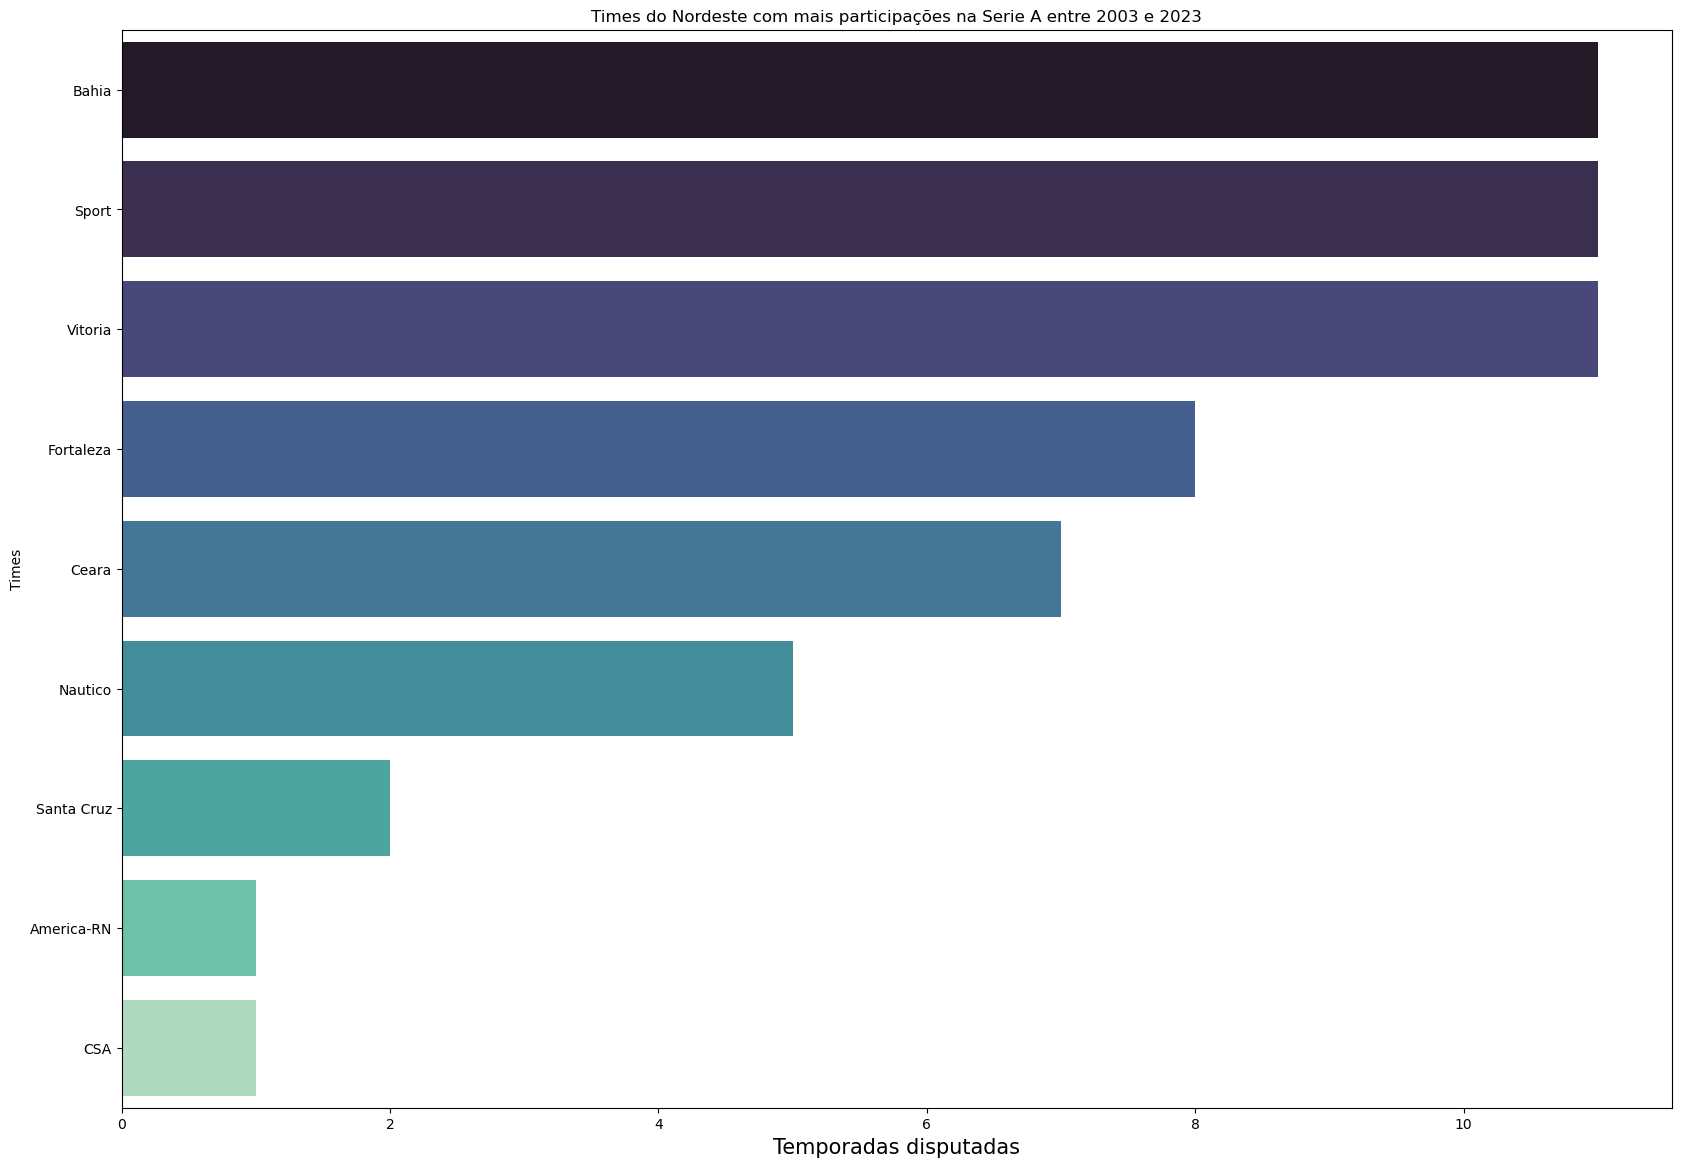

In [40]:
fig, ax = plt.subplots(figsize=(20,14))
ax = sns.barplot(x=times_mais_temporadas.values, y=times_mais_temporadas.index, palette='mako')
ax.set_title('Times do Nordeste com mais participações na Serie A entre 2003 e 2023')
ax.set_xlabel('Temporadas disputadas', fontsize =15)
ax.set_ylabel('Times')
plt.show()

### Os que mais participaram: Bahia, Sport e Vitória com 11 cada
### Os que menos participaram: CSA e América-RN cada com 1

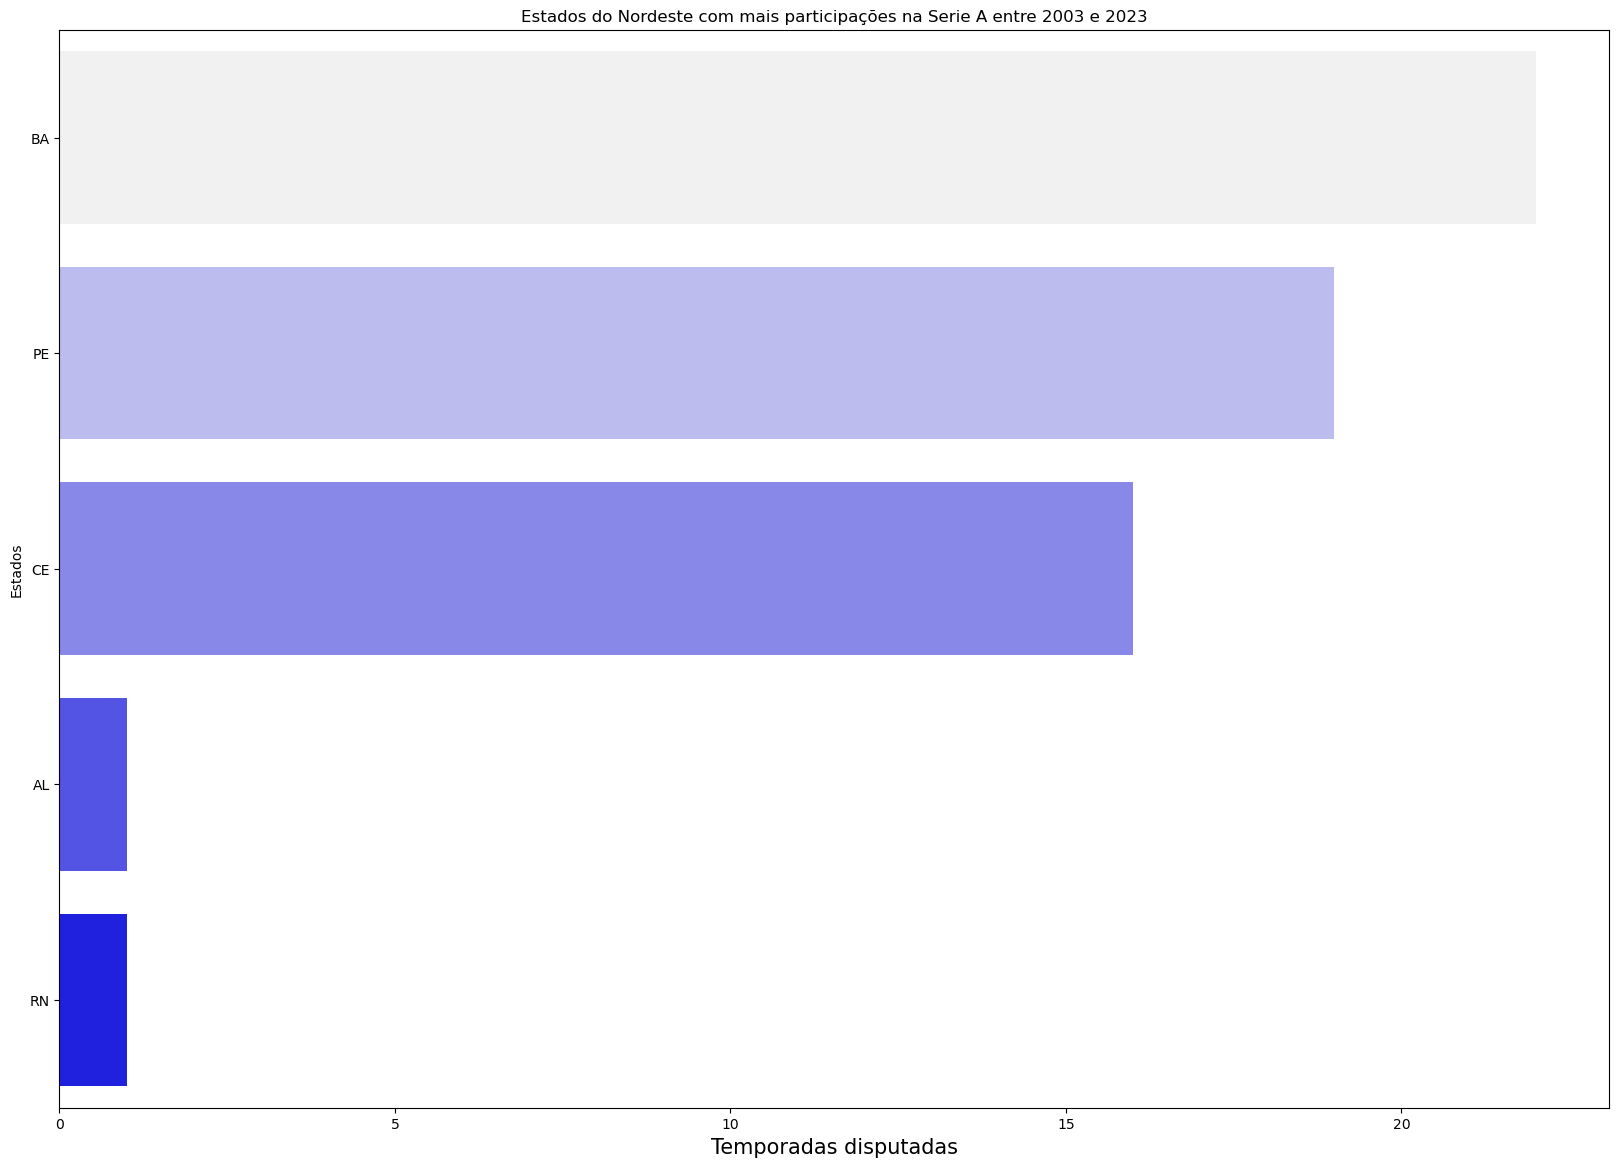

In [44]:
# Agora vamos analisar a quantidade de participações por estado no período 2003-2023
temporadas_por_estado = brasileirao_nordeste.groupby('mandante_estado')['mandante'].count() // 18

# Ordenar os estados por número de temporadas completas (de maior para menor)
estados_mais_temporadas = temporadas_por_estado.sort_values(ascending=False)

#plotando o gráfico:
fig, ax = plt.subplots(figsize=(20,14))
ax = sns.barplot(x=estados_mais_temporadas.values, y=estados_mais_temporadas.index, palette='dark:salmon_r')
ax.set_title('Estados do Nordeste com mais participações na Serie A entre 2003 e 2023')
ax.set_xlabel('Temporadas disputadas', fontsize =15)
ax.set_ylabel('Estados')
plt.show()